<a id="TableOfContents"></a>
# TABLE OF CONTENTS:
<li><a href='#imports'>Imports</a></li>
<li><a href="#acquire">Acquire</a></li>
<li><a href="#prepare">Prepare</a></li>
<li><a href="#explore">Explore</a></li>
<li><a href="#models">Top 3 Models</a></li>
<li><a href="#conclusion">Conclusion</a></li>

##### Orientation:
- Overview
    - Utilizing the 'telco_churn' dataframe, find what drivers there are to customer churn
- Goals
    - Using telco data from MySQL
    - Clean data for use in jupyter notebook
    - Explore data for any significant features
    - Create model to predict customer churn

<a id='imports'></a>
# Imports:
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [1]:
# Remove unwanted warning banners
import warnings
warnings.filterwarnings('ignore')

# .py files
import acquire
import prepare
import presentation

<a id='acquire'></a>
# Acquire:
<li><a href='#TableOfContents'>Table of Contents</a></li>

### Methodology:
1. Using MySQL
    - Check dataframe and tables
    - Combine all tables with a single query
2. Using Python
    - Create SQL connection URL
    - Copy SQL query
3. Acquire telco data
    - pd.read_sql(query, url)

In [2]:
# Using the 'acquire.py' import...
# Acquire the 'telco_churn' via SQL query and read as pandas dataframe
# Get a sample of the imported dataframe
acquire.get_telco_data().sample()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,churn_month,signup_date,contract_type,internet_service_type,payment_type
6914,1,3,1,9817-APLHW,Male,0,No,No,12,Yes,...,No internet service,No,25.0,316.2,No,NaN,2021-01-21,Month-to-month,None,Electronic check


##### Justification:
Simply want to acquire all the data from the SQL database

THEREFORE:
- JOIN ALL TABLES

<a id='prepare'></a>
# Prepare:
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [3]:
# Using the 'prepare.py' import...
# Take the dataframe and prepare it for exploration and modeling
# Add new/agg/dummy columns
# Fix dtypes of incorrect columns
telco = prepare.prep_telco()
telco.sample()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,sign_dayofweek_1,sign_dayofweek_2,sign_dayofweek_3,sign_dayofweek_4,sign_dayofweek_5,sign_dayofweek_6,total_services,total_extra_services,value_per_total_services,value_per_total_extra_services
4119,Male,0,Yes,Yes,19,Yes,Yes,No,No,No,...,0,0,0,0,0,1,6,3,16.825,33.65


##### Justification:
Want to prepare data for exploration and modeling purposes

THEREFORE:
- Fix total_charges
    - 'object' to 'float'
- Fix churn_month
    - 'object' to 'datetime'
- Fix signup_date
    - 'object' to 'datetime'
- Break down signup_date
    - sign_year
        - Detect trends on a yearly basis
    - sign_month
        - Detect trends on a monthly basis
    - sign_day
        - Detect trends on a daily basis
    - sign_dayofweek
        - Detect trends on a day of the week basis
- Create total_services
    - Aggregate services per customer
        - phone_service_Yes
        - multiple_lines_Yes
        - online_security_Yes 
        - online_backup_Yes
        - device_protection_Yes
        - tech_support_Yes
        - streaming_tv_Yes
        - streaming_movies_Yes 
        - internet_service_type_DSL 
        - internet_service_type_Fiber optic
    - Detect trends of total services count
- Create total_extra_services
    - Aggregate extra services per customer
        - online_security_Yes 
        - online_backup_Yes
        - device_protection_Yes
        - tech_support_Yes
        - streaming_tv_Yes
        - streaming_movies_Yes 
    - Detect trends of extra services count
- Create value_per_total_services
    - Aggregate total_services / monthly_charges
    - Detect trends of cost per overall services
- Create value_per_total_extra_services
    - Aggregate total_extra_services / monthly_charges
    - Detect trends of cost per extra services
- Create dummies
    - Easier to explore/model object columns as dummy values

<a id='explore'></a>
# Explore:
<li><a href='#TableOfContents'>Table of Contents</a></li>

### Question:
- What top 4 features have the strongest relation with customer churn within the dataset? (P-Value < 0.05)

### Top 5 Features
- contract_type
- sign_year
- tenure
- internet_service_type
- payment_type

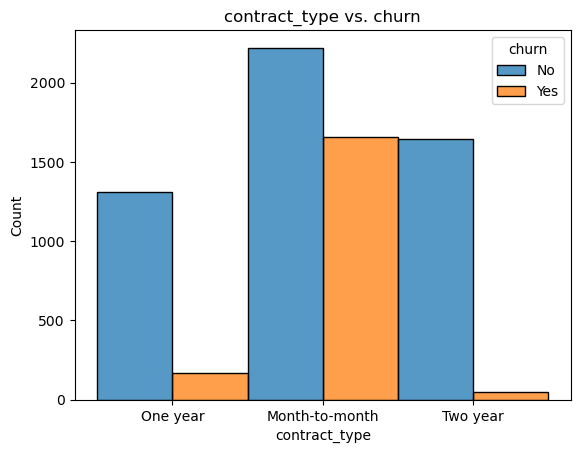

contract_type p_val: 5.863038300673391e-258



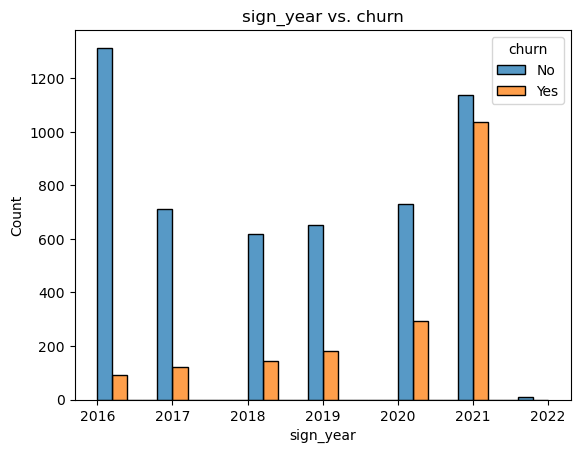

sign_year p_val: 2.9329097538306124e-188



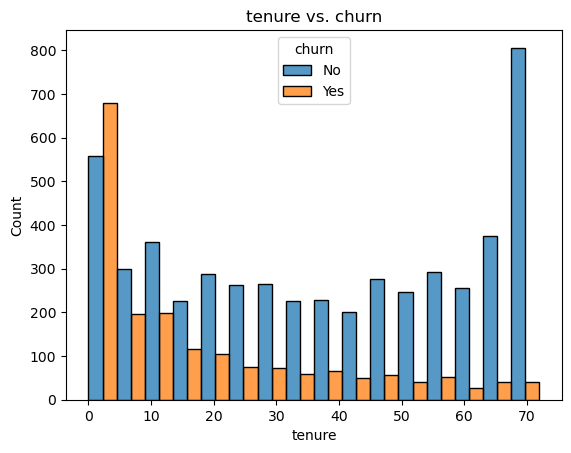

tenure p_val: 1.2807811055496877e-176



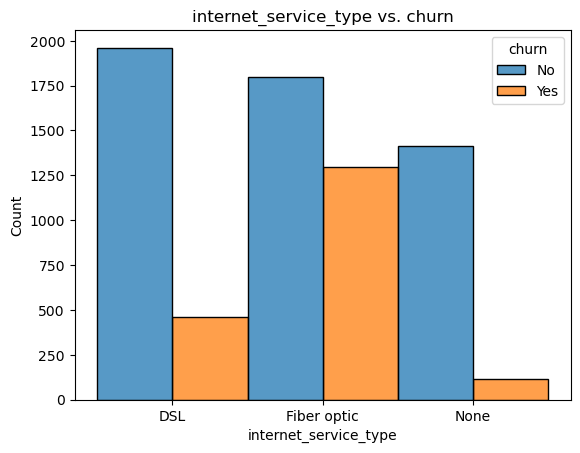

internet_service_type p_val: 9.571788222840544e-160



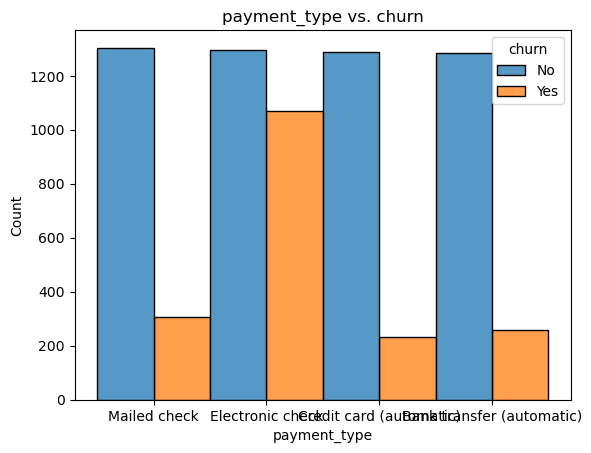

payment_type p_val: 3.6823546520097993e-140



In [4]:
# Using the 'presentation.py' import...
# Visualize and get the p_value of the top 4 features
# when compared with churn
presentation.explore()

### Takeaway:
- From all of the features when compared with churn, 'contract_type', 'sign_year', 'tenure', 'internet_service_type', and 'payment_type' have the strongest relations.

##### Justification:
Want to find the top 5 features that have the strongest relation to customer churn

THEREFORE:
- starting with the lowest p-value from a stats test
    - Top 5 features

<a id='models'></a>
# Top 3 Models:
<li><a href='#TableOfContents'>Table of Contents</a></li>

- RFC Model 7
- LR Model 1
- DTC Model 3

### Steps:
- Feature selection:
    - Strongest features:
        - 'online_security_No'
        - 'online_backup_No'
        - 'device_protection_No'
        - 'tech_support_No'
        - 'contract_type_Month-to-month'
        - 'internet_service_type_Fiber_optic'
        - 'payment_type_Electronic_check'
        - 'sign_year'
        - 'tenure'
        - 'value_per_total_services'
- Hyperparameters:
    - 'For loop' for different depths
- Model selection:
    - Compare 'train', 'val', 'diff' scores then get the 'test' score
- TN/TP:
    - Using a confusion_matrix
    - Compare the TN and TP rates

In [5]:
# Using the 'presentation.py' file...
# Acquire the top 3 models and put their scores in a pandas dataframe
presentation.top3models()

,model,test,"TP(""No"")","TN(""Yes"")"
0,actual,100.0,100.0,100.0
1,baseline,73.5,73.5,0.0
2,RFC,78.0,83.2,60.5
3,LR,77.5,83.7,58.3
4,DTC,76.8,79.4,61.6


- For overall score:
    - Random Forest Classifier
        - 78.0%
        - +4.5%
- For True Positives ('No'):
    - Logistic Regression
        - 83.7%
        - +10.2%
- For True Negatives ('Yes'):
    - Decision Tree Classifier
        - 61.6%
        - +61.6%

##### Justification:
Want to find the top 3 performing models to predict customer churn.

THEREFORE:
- Top model for...
    - Overall score:
        - If someone does not care whether or not someone churned, but want the best performing model overall
    - TP('No'/DID NOT CHURN):
        - If someone only cares to predict customers that will not churn
    - TN('Yes'/DID CHURN):
        - If someone only cares to predict customers that will churn

<a id='conclusion'></a>
# Conclusion:
<li><a href='#TableOfContents'>Table of Contents</a></li>

### Recommendations
- Focus advertisement efforts towards families and couples and avoid older population
- Market offers as single services or bundled services with at least 3 additional services
- For customers, that want internet services
    - Get them to go with DSL services
    - Minimum add-ons of 3
- For paying customers:
    - Do not allow monthly contracts
    - Do not allow electronic check forms of payment
    
### Takeaways
- Target audience:
    - Couples
    - Families/Dependents
    - Non-senior citizen
- Services Emphasis:
    - Internet Services:
        - No internet or DSL
        - No internet or at least bundle 3 add-ons
- Payments:
    - DO NOT ALLOW ELECTRONIC CHECK
- Contracts:
    - DO NOT ALLOW MONTH CONTRACT
    
### If I Had More Time
- Why does everyone only signup on the 21st of any given month/year
- Why did everyone churn on 31JAN2022
- What happened in 2021
- Why is tenure getting shorter, but monthly_charges are dropping
- Get prices of all services
- Check for customer comments/sentiment
- Check for local competition
- Check for local 'common knowledge'/'norm'
- Check advertisements

In [6]:
# Using the 'presentation.py' file...
# Create a predictions.csv file using the best model
presentation.pred_csv()

,customer_id,churn,predictions
1247,1845-ZLLIG,No,No
7011,9945-PSVIP,No,No
2647,3761-FLYZI,No,No
6149,8711-LOBKY,No,No
5797,8164-OCKUJ,No,No
...,...,...,...
6534,9278-VZKCD,No,No
2010,2898-MRKPI,No,No
570,0839-QNXME,No,No
362,0531-ZZJWQ,No,No
